# QUESTION 1

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [172]:
# visualize the datset

cont = pd.read_excel('Bull_Bear_Spread.xlsx')

In [173]:
cont.Date.value_counts()

1987-07-24    1
2011-03-17    1
2011-06-09    1
2011-06-02    1
2011-05-26    1
             ..
1999-04-29    1
1999-04-22    1
1999-04-15    1
1999-04-08    1
2023-02-23    1
Name: Date, Length: 1856, dtype: int64

In [174]:
cont.Date = pd.to_datetime(cont.Date)

In [175]:
cont

,Date,Close
0,1987-07-24,0.220000
1,1987-07-31,0.000000
2,1987-08-07,0.270000
3,1987-08-14,0.250000
4,1987-08-21,0.600000
...,...,...
1851,2023-01-26,-0.083094
1852,2023-02-02,-0.046512
1853,2023-02-09,0.125000
1854,2023-02-16,0.052941


In [176]:
cont1 = cont.copy()

In [177]:
# reset index 

cont1.set_index('Date')

,Close
Date,
1987-07-24,0.220000
1987-07-31,0.000000
1987-08-07,0.270000
1987-08-14,0.250000
1987-08-21,0.600000
...,...
2023-01-26,-0.083094
2023-02-02,-0.046512
2023-02-09,0.125000


In [178]:
# download data from yahoo finance for S&P 500 
import yfinance as yf
currency = "^GSPC"
snp500 = yf.download(currency)[['Adj Close']].copy()

[*********************100%***********************]  1 of 1 completed


In [179]:
snp500

,Adj Close
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000
...,...
2023-03-13,3855.760010
2023-03-14,3919.290039
2023-03-15,3891.929932


In [180]:
snp500.index = pd.to_datetime(snp500.index)

In [191]:
snp500.index.dtype

dtype('<M8[ns]')

In [192]:
cont1.index = pd.to_datetime(cont1.index)
cont1.index.dtype

dtype('<M8[ns]')

In [205]:
cont2 = cont1.set_index('Date')
cont2

,Close
Date,
1987-07-24,0.220000
1987-07-31,0.000000
1987-08-07,0.270000
1987-08-14,0.250000
1987-08-21,0.600000
...,...
2023-01-26,-0.083094
2023-02-02,-0.046512
2023-02-09,0.125000


In [208]:
cont2.index = pd.to_datetime(cont2.index)

In [243]:
# merge two datasets 

cont_snp = pd.merge_asof(cont2, snp500, left_index = True, right_index=True)

In [244]:
cont_snp.dropna()

,Close,Adj Close
Date,,
1987-07-24,0.220000,309.269989
1987-07-31,0.000000,318.660004
1987-08-07,0.270000,323.000000
1987-08-14,0.250000,333.989990
1987-08-21,0.600000,335.899994
...,...,...
2023-01-26,-0.083094,4060.429932
2023-02-02,-0.046512,4179.759766
2023-02-09,0.125000,4081.500000


# (a)

In [110]:
# speculators are very optimistic - future prices will fall - SHORT 
# speculators are pessimistic - future prices will rise - LONG 

# SENTIMENT ANALYSIS 

Text(0.5, 1.0, 'sentiment over time')

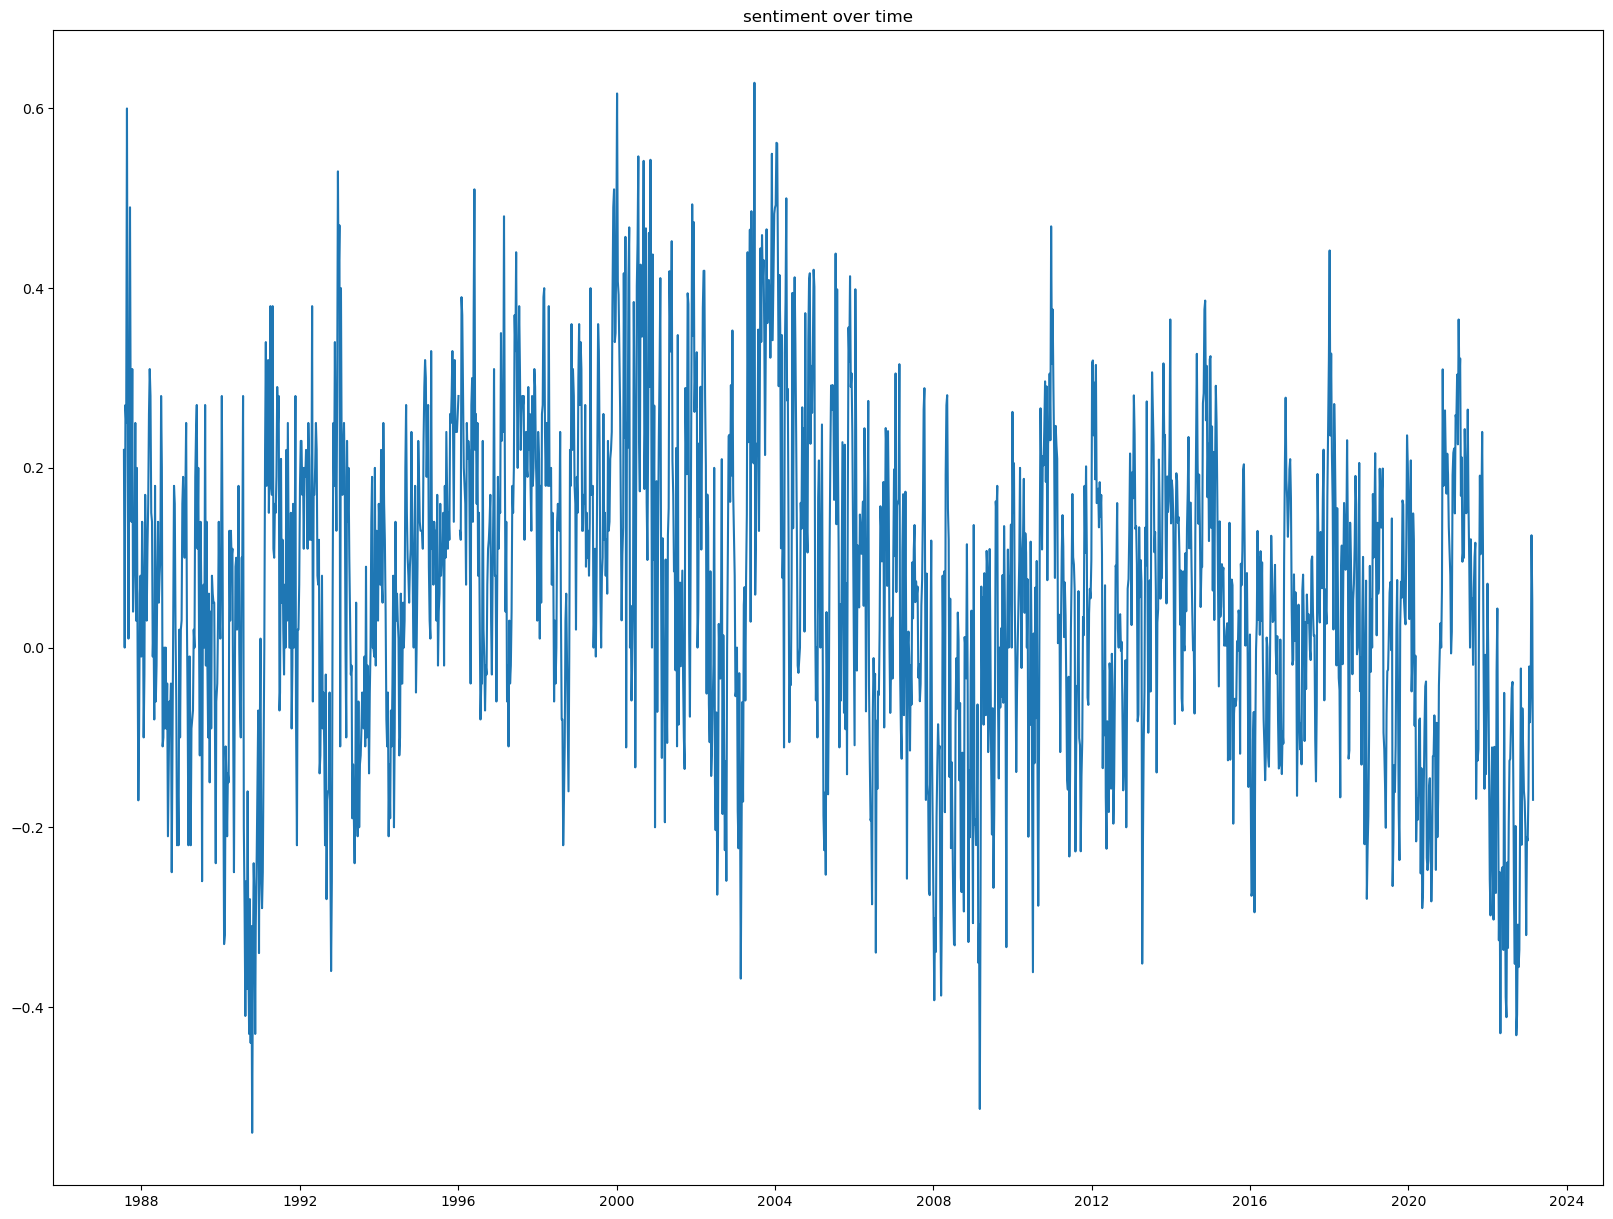

In [246]:
# plot the graph 

plt.figure(figsize=(20,15))
plt.plot(cont_snp['Close'])
plt.title('sentiment over time')

In [122]:
# contrarianism to enter short positions where sentiment is very high and long positions where it is low

In [247]:
# compute max and min for each year 

# extract the year from index 
cont_snp['Year'] = pd.DatetimeIndex(cont_snp.index).year

In [248]:
cont_snp

,Close,Adj Close,Year
Date,,,
1987-07-24,0.220000,309.269989,1987
1987-07-31,0.000000,318.660004,1987
1987-08-07,0.270000,323.000000,1987
1987-08-14,0.250000,333.989990,1987
1987-08-21,0.600000,335.899994,1987
...,...,...,...
2023-01-26,-0.083094,4060.429932,2023
2023-02-02,-0.046512,4179.759766,2023
2023-02-09,0.125000,4081.500000,2023


In [249]:
# group the data by year and now find maximum and minimum values 
# Group the data by year and find the maximum and minimum sentiment values

max_sentiment = cont_snp.groupby('Year')['Close'].max()
min_sentiment = cont_snp.groupby('Year')['Close'].min()

In [250]:
# add columns in the dataset - for maxima and minima 
# if that value is maximum then write yes 

# Add columns for maxima and minima
cont_snp['maxima'] = cont_snp.groupby('Year')['Close'].transform(max)
cont_snp['minima'] = cont_snp.groupby('Year')['Close'].transform(min)

# Mark rows where Close is the maximum for the year
cont_snp['maxima'] = cont_snp.apply(lambda row: 'yes' if row['Close'] == row['maxima'] else 'no', axis=1)
cont_snp['minima'] = cont_snp.apply(lambda row: 'yes' if row['Close'] == row['minima'] else 'no', axis=1)

In [251]:
# now trading strategy - go short where we have maximum 
# go long where we have minimum 

### trading strategy

In [252]:
# generate signals -1, 1 and 0 

cont_snp['filter'] = cont_snp['maxima'].apply(lambda x: -1 if x == 'yes' else 0)
cont_snp.loc[cont_snp['minima'] == 'yes', 'filter'] = 1
cont_snp

,Close,Adj Close,Year,maxima,minima,filter
Date,,,,,,
1987-07-24,0.220000,309.269989,1987,no,no,0
1987-07-31,0.000000,318.660004,1987,no,no,0
1987-08-07,0.270000,323.000000,1987,no,no,0
1987-08-14,0.250000,333.989990,1987,no,no,0
1987-08-21,0.600000,335.899994,1987,yes,no,-1
...,...,...,...,...,...,...
2023-01-26,-0.083094,4060.429932,2023,no,no,0
2023-02-02,-0.046512,4179.759766,2023,no,no,0
2023-02-09,0.125000,4081.500000,2023,yes,no,-1


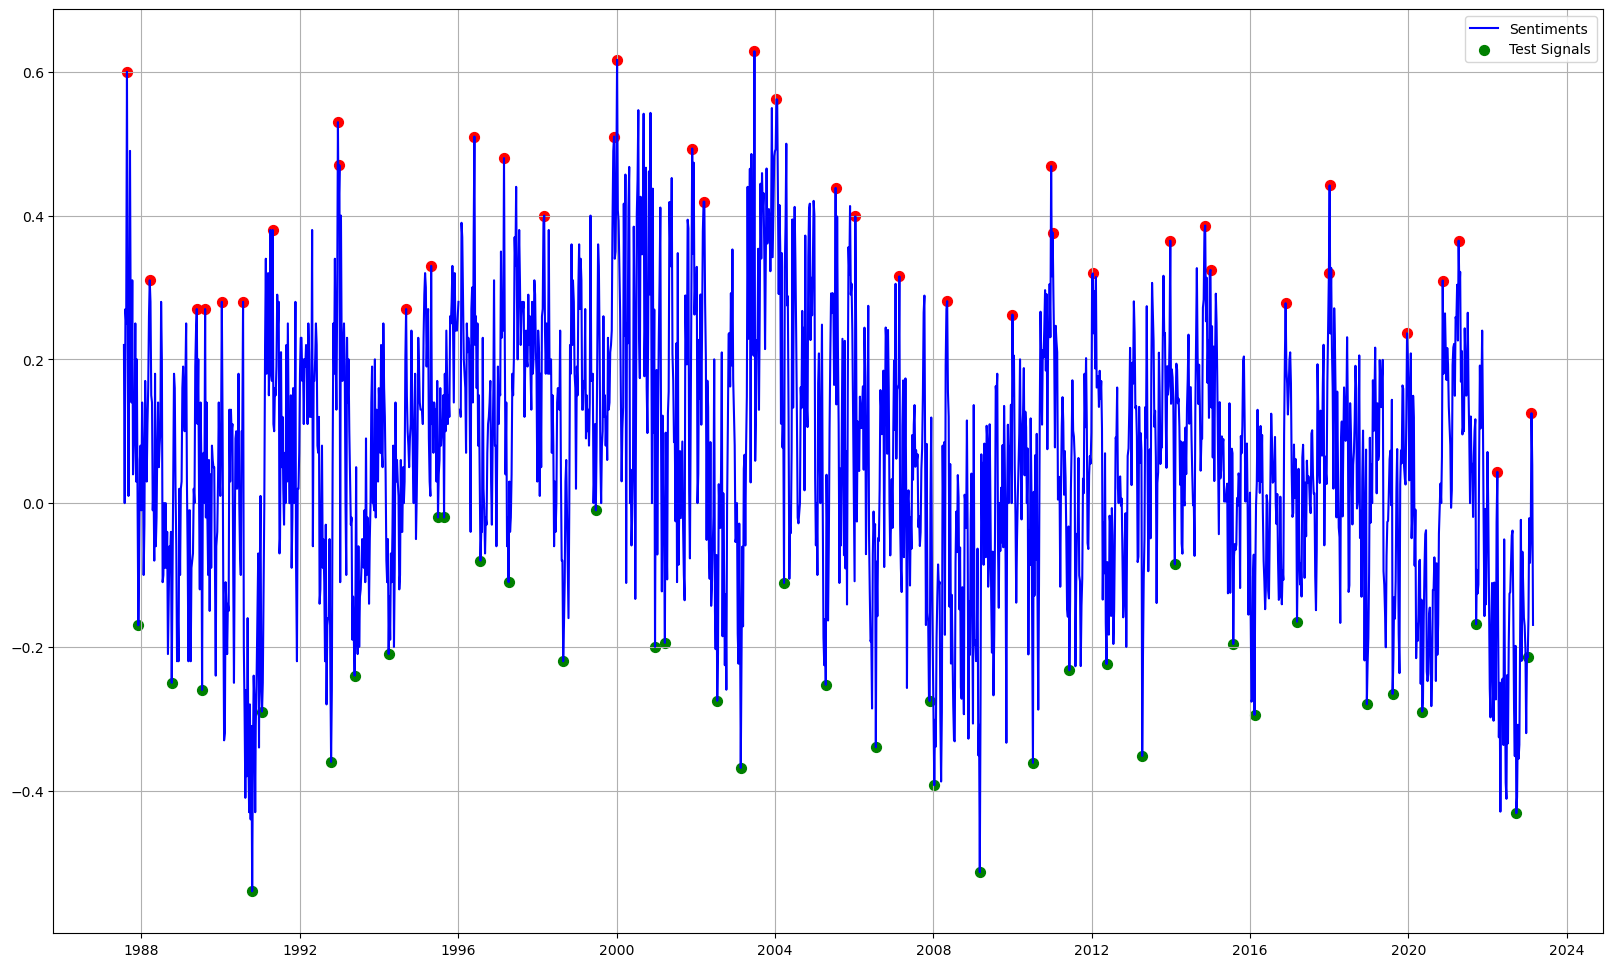

In [253]:
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(cont_snp["Close"], color = 'blue')
ax.scatter(cont_snp[cont_snp['filter'] == 1].index, cont_snp[cont_snp['filter'] == 1]['Close'], color='green', marker='o', s=50)
ax.scatter(cont_snp[cont_snp['filter'] == -1].index, cont_snp[cont_snp['filter'] == -1]['Close'], color='red', marker='o', s=50)
ax.legend(["Sentiments", "Test Signals"])
ax.grid()

# red is for shorting 
# green signifies going long 

In [254]:
# calculate returns from this trade 

# first get returns from S&P500

cont_snp["S&P500 Returns"] = np.log(cont_snp["Adj Close"]).diff()
cont_snp

,Close,Adj Close,Year,maxima,minima,filter,S&P500 Returns
Date,,,,,,,
1987-07-24,0.220000,309.269989,1987,no,no,0,NaN
1987-07-31,0.000000,318.660004,1987,no,no,0,0.029910
1987-08-07,0.270000,323.000000,1987,no,no,0,0.013528
1987-08-14,0.250000,333.989990,1987,no,no,0,0.033459
1987-08-21,0.600000,335.899994,1987,yes,no,-1,0.005702
...,...,...,...,...,...,...,...
2023-01-26,-0.083094,4060.429932,2023,no,no,0,0.040607
2023-02-02,-0.046512,4179.759766,2023,no,no,0,0.028965
2023-02-09,0.125000,4081.500000,2023,yes,no,-1,-0.023789


In [255]:
# now strategy returns 

cont_snp['strat_returns'] = (np.exp((cont_snp['filter'].shift()*cont_snp['S&P500 Returns']).cumsum())-1)
cont_snp

,Close,Adj Close,Year,maxima,minima,filter,S&P500 Returns,strat_returns
Date,,,,,,,,
1987-07-24,0.220000,309.269989,1987,no,no,0,NaN,NaN
1987-07-31,0.000000,318.660004,1987,no,no,0,0.029910,0.000000
1987-08-07,0.270000,323.000000,1987,no,no,0,0.013528,0.000000
1987-08-14,0.250000,333.989990,1987,no,no,0,0.033459,0.000000
1987-08-21,0.600000,335.899994,1987,yes,no,-1,0.005702,0.000000
...,...,...,...,...,...,...,...,...
2023-01-26,-0.083094,4060.429932,2023,no,no,0,0.040607,0.068785
2023-02-02,-0.046512,4179.759766,2023,no,no,0,0.028965,0.068785
2023-02-09,0.125000,4081.500000,2023,yes,no,-1,-0.023789,0.068785


In [256]:
# calculate for successful trades 

cont_snp["success"] = ((cont_snp[cont_snp["filter"] != 0]["strat_returns"].diff() > 0) * 1).shift(-1)
cont_snp["success"] = cont_snp["success"].fillna(0)
cont_snp

,Close,Adj Close,Year,maxima,minima,filter,S&P500 Returns,strat_returns,success
Date,,,,,,,,,
1987-07-24,0.220000,309.269989,1987,no,no,0,NaN,NaN,0.0
1987-07-31,0.000000,318.660004,1987,no,no,0,0.029910,0.000000,0.0
1987-08-07,0.270000,323.000000,1987,no,no,0,0.013528,0.000000,0.0
1987-08-14,0.250000,333.989990,1987,no,no,0,0.033459,0.000000,0.0
1987-08-21,0.600000,335.899994,1987,yes,no,-1,0.005702,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
2023-01-26,-0.083094,4060.429932,2023,no,no,0,0.040607,0.068785,0.0
2023-02-02,-0.046512,4179.759766,2023,no,no,0,0.028965,0.068785,0.0
2023-02-09,0.125000,4081.500000,2023,yes,no,-1,-0.023789,0.068785,0.0


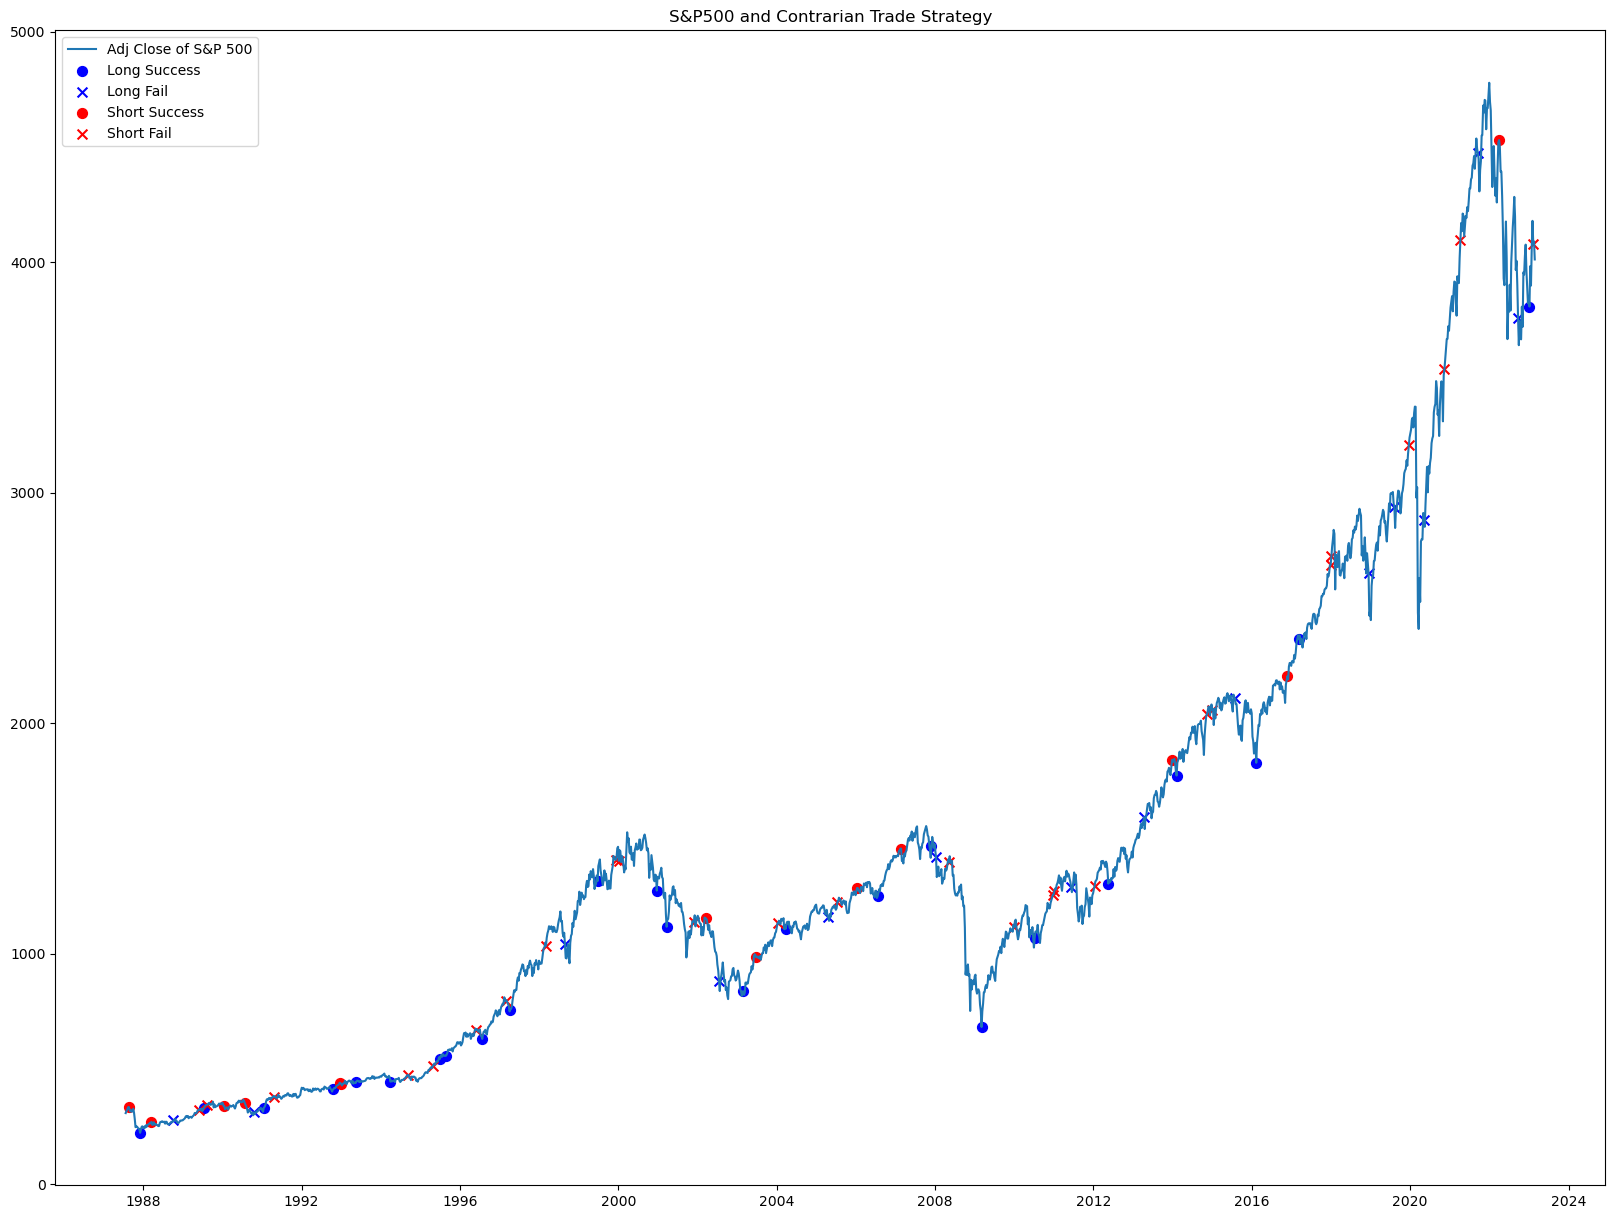

In [257]:
plt.figure(figsize = (20, 15))

plt.title("S&P500 and Contrarian Trade Strategy")

plt.plot(cont_snp["Adj Close"])

longsuccess = cont_snp[(cont_snp["success"] == 1) & (cont_snp["filter"] == 1)]
longfail = cont_snp[(cont_snp["success"] == 0) & (cont_snp["filter"] == 1)] 
shortsuccess = cont_snp[(cont_snp["success"] == 1) & (cont_snp["filter"] == -1)]
shortfail = cont_snp[(cont_snp["success"] == 0) & (cont_snp["filter"] == -1)]

plt.scatter(longsuccess.index, longsuccess["Adj Close"], color = 'blue', s = 50)
plt.scatter(longfail.index, longfail["Adj Close"], color = 'blue', s = 50, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["Adj Close"], color = 'red', s = 50)
plt.scatter(shortfail.index, shortfail["Adj Close"], color = 'red', s = 50, marker = "x")

plt.legend(["Adj Close of S&P 500", "Long Success", "Long Fail", "Short Success", "Short Fail"])


# (b)

#### Total Rate of Return 


In [263]:

P = 1000000
A = (((cont_snp["strat_returns"]/100)+1)*P)[-1]
total_return = ((A/P) - 1) * 100


print('total rate of return is', (total_return))

total rate of return is 0.06645650527956626


#### Annualized returns

In [264]:
P = 1000000
A = (((cont_snp["strat_returns"]/100)+1)*P)[-1]
t = len(cont_snp)/365

total_return = ((A/P)-1)*100
ann_return = ((1+total_return)**(1/t)-1)*100

print('annualized returns are', (ann_return))

annualized returns are 1.2733753773389145


#### rate of return over only days where we hold position

In [267]:
# calculate number of days where we have 1 and -1 in the'filter' column 

cont_snp['filter'].value_counts()

# so total number of days are 39+38 = 77

 0    1779
-1      39
 1      38
Name: filter, dtype: int64

In [268]:
# return 

A = (((cont_snp[cont_snp["filter"] != 0]["strat_returns"]/100)+1)*P)[-1]
total_return_77 = ((A/P) - 1) * (365/77)

print('rate of return over only days where we hold position', (total_return_77))

rate of return over only days where we hold position 0.0032605677156061653


#### sharpe ratio

In [269]:
# download data on the assumed risk free rate

rf_rate = pd.read_csv("1-year-treasury-rate-yield-chart.csv", index_col = 0, parse_dates = True).dropna()
rf_rate.head()

,interest
date,
2062-01-02,3.22
2062-01-03,3.24
2062-01-04,3.24
2062-01-05,3.26
2062-01-08,3.31


In [272]:
rf_rate.index = pd.to_datetime(rf_rate.index)

In [276]:
# merge datasets 

rf_rate = rf_rate.sort_index()
cont_rf = pd.merge_asof(cont_snp, rf_rate, left_index=True, right_index=True)
cont_rf

,Close,Adj Close,Year,maxima,minima,filter,S&P500 Returns,strat_returns,success,interest
Date,,,,,,,,,,
1987-07-24,0.220000,309.269989,1987,no,no,0,NaN,NaN,0.0,6.82
1987-07-31,0.000000,318.660004,1987,no,no,0,0.029910,0.000000,0.0,6.89
1987-08-07,0.270000,323.000000,1987,no,no,0,0.013528,0.000000,0.0,6.97
1987-08-14,0.250000,333.989990,1987,no,no,0,0.033459,0.000000,0.0,6.91
1987-08-21,0.600000,335.899994,1987,yes,no,-1,0.005702,0.000000,1.0,7.04
...,...,...,...,...,...,...,...,...,...,...
2023-01-26,-0.083094,4060.429932,2023,no,no,0,0.040607,0.068785,0.0,4.64
2023-02-02,-0.046512,4179.759766,2023,no,no,0,0.028965,0.068785,0.0,4.64
2023-02-09,0.125000,4081.500000,2023,yes,no,-1,-0.023789,0.068785,0.0,4.64


In [285]:
# interest column is in %

cont_rf['interest'] = cont_rf['interest']/100

In [286]:
cont_rf['excess_returns'] = cont_rf['strat_returns'] - cont_rf['interest']
cont_rf

,Close,Adj Close,Year,maxima,minima,filter,S&P500 Returns,strat_returns,success,interest,excess_returns
Date,,,,,,,,,,,
1987-07-24,0.220000,309.269989,1987,no,no,0,NaN,NaN,0.0,0.0682,NaN
1987-07-31,0.000000,318.660004,1987,no,no,0,0.029910,0.000000,0.0,0.0689,-0.068900
1987-08-07,0.270000,323.000000,1987,no,no,0,0.013528,0.000000,0.0,0.0697,-0.069700
1987-08-14,0.250000,333.989990,1987,no,no,0,0.033459,0.000000,0.0,0.0691,-0.069100
1987-08-21,0.600000,335.899994,1987,yes,no,-1,0.005702,0.000000,1.0,0.0704,-0.070400
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26,-0.083094,4060.429932,2023,no,no,0,0.040607,0.068785,0.0,0.0464,0.022385
2023-02-02,-0.046512,4179.759766,2023,no,no,0,0.028965,0.068785,0.0,0.0464,0.022385
2023-02-09,0.125000,4081.500000,2023,yes,no,-1,-0.023789,0.068785,0.0,0.0464,0.022385


In [288]:
# calculate annualized returns 

P = 1000000
A = (((cont_rf["excess_returns"]/100)+1)*P)[-1]
t = len(cont_snp)/365

total_return = ((A/P)-1)*100
ann_return = ((1+total_return)**(1/t)-1)*100
ann_return

0.3912904047960408

In [289]:
# calculate annualized SD

excess_ann_std = cont_rf["excess_returns"].std()*np.sqrt(365)*100
excess_ann_std

128.99792455784026

In [290]:
print("the sharpe ratio is:", (ann_return)/excess_ann_std)

the sharpe ratio is: 0.003033307753882455


#### Gini coefficient 

In [297]:
returns = cont_rf[['strat_returns']]
returns.columns = ['Returns']

/var/folders/1d/l6tryydj5ll_81bf6qw66y1m0000gn/T/ipykernel_38108/487373968.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LorenzCurve = pd.DataFrame({ 'Returns': [0]}).append(LorenzCurve)


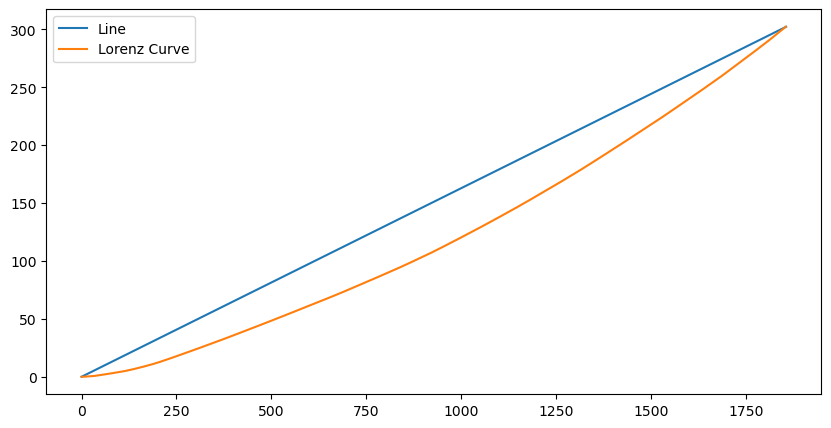

In [294]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values( by = "Returns"))
    # start from 0
    LorenzCurve = pd.DataFrame({ 'Returns': [0]}).append(LorenzCurve)
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["Returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["Returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods)/2)
    gini = UpArea / AllArea
    return gini[0], Line, LorenzCurve

returns = cont_rf[['strat_returns']]
returns.columns = ['Returns']

gini_coef, Line, LorenzCurve = GINI_COEF(returns)

plt.figure(figsize = (10, 5))
plt.plot(Line["Returns"].values)
plt.plot(LorenzCurve["Returns"].values)
plt.legend(["Line", "Lorenz Curve"])


In [299]:
# gini coefficient 
GINI_COEF(returns)[0]

/var/folders/1d/l6tryydj5ll_81bf6qw66y1m0000gn/T/ipykernel_38108/487373968.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LorenzCurve = pd.DataFrame({ 'Returns': [0]}).append(LorenzCurve)


0.19148061343758463

#### max drawdown

the max drawdown is: -0.9178589667347015


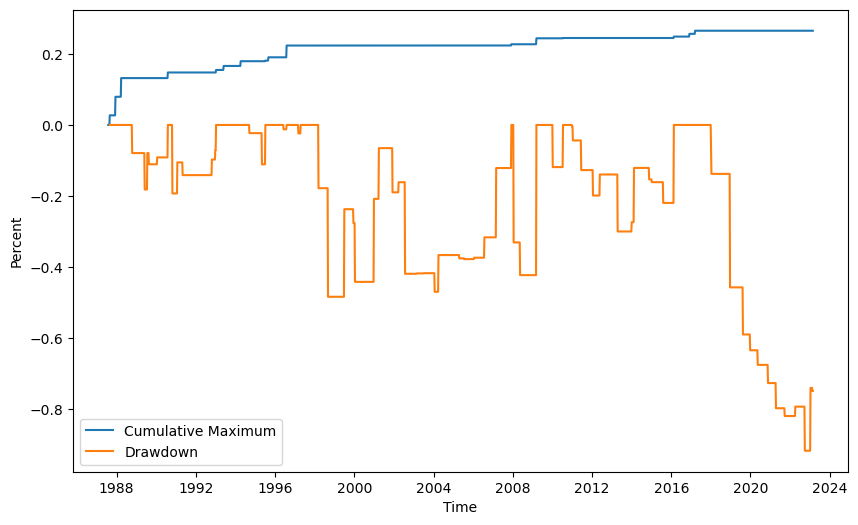

In [331]:
# maximum drawdown 

cumulative_max = cont_rf['strat_returns'].cummax()
drawdown = (cont_rf['strat_returns'] - cumulative_max)/cumulative_max


print('the max drawdown is:', drawdown.min())

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cumulative_max, label='Cumulative Maximum')
ax.plot(drawdown, label='Drawdown')
ax.set_xlabel('Time')
ax.set_ylabel('Percent')
ax.legend()
plt.show()


#### Return on Account

In [334]:
roa = cont_rf['strat_returns'].sum() / ((cont_rf['strat_returns'].cumsum() - cumulative_max) + 0.0001).min() * -1


In [337]:
print('return on account is:', roa)

return on account is: -3022686.5029297057


# QUESTION 2

# (a)

On 10th March 2023, Silicon Valley Bank was closed by the regulators and FDIC took control over the bank

# (b)

### (i) EURUSD

People will start withdrawing money from US bank and start parking their funds to other banks. There will be a capital outflow from US bank to other countries. This will lead to a decrease in demand of US currency and increase in demand for Euro which will lead to appreciation of Euro.

### (ii) Ten Year US 

#### since people will start withdrawing money, investors will invest that money in treasury bonds thus lowering yields and increasing bond prices. The ten year US interest rates will go down due lowe yields

### (iii) SP500

#### Investors confidence and investors will be pessimistic about the economy due to which they will start withdrawing money. This will lead to a fall in SP500

# (c)

### (i) EURUSD

#### It actually fell to 0.94 from 0.95 on March 8

### (ii) Ten Year US i

#### It fell from 39.76 to 39.25 

### (iii) SP500

#### It fell from 3992 on March 8 to 3861 on March 10

# (d)

#### The bank collapse in March was a result of a liquidity crisis caused by the high volume of withdrawals from startups. These startups may have been struggling due to economic conditions, and therefore needed to withdraw their funds from the bank to stay afloat.

#### At the same time, the record-breaking job growth in February could be attributed to a strong overall economy, with many industries experiencing growth and expansion. This may have led to increased hiring and job creation in a variety of sectors.

#### Overall, the explanation is that the economy as a whole is growing and creating jobs, but some individual businesses may still struggle and experience financial difficulties, leading to events like the bank collapse mentioned in the first article.